In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# from ..scripts import data_cleaning

In [24]:
INPUT_DIR = "../data/input/"

df = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")

In [25]:
def clean(df: pd.DataFrame) -> None:
    # DAYS_EMPLOYED anomalies
    df["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)

    # Encode binary categorical features
    for col in ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]:
            df[col].replace({"Y": 1, "N": 0}, inplace=True)
            df[col] = df[col].astype(float)

clean(df)

In [26]:
# 新しく作成した特徴量のリスト
new_features = [
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO",
    "INCOME_PER_CHILD",
    "INCOME_PER_FAM_MEMBER",
    "CREDIT_TERM",
    "DAYS_EMPLOYED_PERC",
    "DAYS_REGISTRATION_PERC",
    "DAYS_ID_PUBLISH_PERC",
    "AGE_IN_YEARS",
    "YEARS_EMPLOYED"
]

def generate_basic_features(df: pd.DataFrame) -> pd.DataFrame:
    df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / (1 + df["AMT_INCOME_TOTAL"])
    df["ANNUITY_INCOME_RATIO"] = df["AMT_ANNUITY"] / (1 + df["AMT_INCOME_TOTAL"])
    df["INCOME_PER_CHILD"] = df["AMT_INCOME_TOTAL"] / (1 + df["CNT_CHILDREN"])
    df["INCOME_PER_FAM_MEMBER"] = df["AMT_INCOME_TOTAL"] / (1 + df["CNT_FAM_MEMBERS"])
    df["CREDIT_TERM"] = df["AMT_ANNUITY"] / (1 + df["AMT_CREDIT"])
    df["DAYS_EMPLOYED_PERC"] = df["DAYS_EMPLOYED"] / (1 + df["DAYS_BIRTH"])
    df["DAYS_REGISTRATION_PERC"] = df["DAYS_REGISTRATION"] / (1 + df["DAYS_BIRTH"])
    df["DAYS_ID_PUBLISH_PERC"] = df["DAYS_ID_PUBLISH"] / (1 + df["DAYS_BIRTH"])
    df["AGE_IN_YEARS"] = (-df["DAYS_BIRTH"] / 365).astype(float)
    df["YEARS_EMPLOYED"] = (-df["DAYS_EMPLOYED"] / 365).astype(float)
    return df


def save_features(df: pd.DataFrame, filename: str) -> None:
    os.makedirs("features", exist_ok=True)  # 仮のフォルダ
    df.to_csv(os.path.join("features", filename), index=False)


In [27]:
df = generate_basic_features(df)

In [28]:
description = df[new_features].describe()
print(description)

       CREDIT_INCOME_RATIO  ANNUITY_INCOME_RATIO  INCOME_PER_CHILD  \
count        171202.000000         171196.000000      1.712020e+05   
mean              3.958291              0.181052      1.393598e+05   
std               2.688682              0.094649      1.040562e+05   
min               0.066667              0.003333      3.000000e+03   
25%               2.018659              0.114793      7.875000e+04   
50%               3.267226              0.162974      1.170000e+05   
75%               5.166108              0.229315      1.800000e+05   
max              49.226106              1.570565      1.350000e+07   

       INCOME_PER_FAM_MEMBER    CREDIT_TERM  DAYS_EMPLOYED_PERC  \
count           1.712000e+05  171196.000000       140304.000000   
mean            5.738487e+04       0.053735            0.157095   
std             4.008160e+04       0.022505            0.133476   
min             2.647059e+03       0.022076            0.000042   
25%             3.375000e+04      

<Axes: >

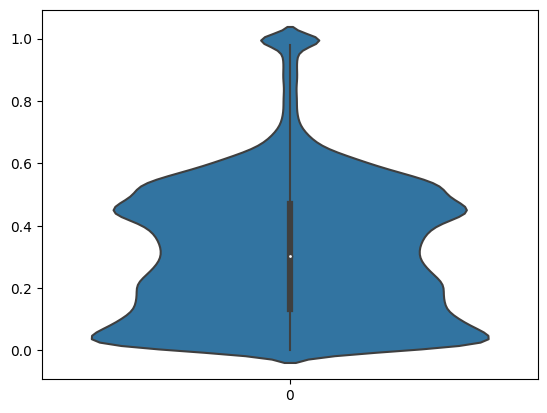

In [29]:
sns.violinplot(df['DAYS_REGISTRATION_PERC'])

In [30]:
df['DAYS_BIRTH'].describe()

count    171202.000000
mean     -16045.340504
std        4363.792228
min      -25229.000000
25%      -19686.000000
50%      -15778.000000
75%      -12420.000000
max       -7673.000000
Name: DAYS_BIRTH, dtype: float64

In [32]:
save_features(df, 'basic_features.csv')